## Performing necessary data cleaning to ensure accuracy and consistency.
### This step includes handling missing values, removing duplicates, and correcting data types.
### Creating and updating the dataset based on the given financial data.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import io 
import os
import sys

In [61]:
import pandas as pd

file_path = r"C:\Users\USER\Downloads\Example10\OneDrive\Power BI\Financial_data\financial_df.xlsx"
df = pd.read_excel(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        6000 non-null   object 
 1   Customer_ID               6000 non-null   object 
 2   Month                     6000 non-null   object 
 3   Name                      5370 non-null   object 
 4   Age                       6000 non-null   object 
 5   SSN                       6000 non-null   object 
 6   Occupation                6000 non-null   object 
 7   Annual_Income             6000 non-null   object 
 8   Monthly_Inhand_Salary     5069 non-null   float64
 9   Num_Bank_Accounts         6000 non-null   int64  
 10  Num_Credit_Card           6000 non-null   int64  
 11  Interest_Rate             6000 non-null   int64  
 12  Num_of_Loan               6000 non-null   object 
 13  Type_of_Loan              5364 non-null   object 
 14  Delay_fr

In [3]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x5c5a,CUS_0xbab0,September,Lioneld,39,758-36-8574,Scientist,119312.08,9538.088084,5,...,Standard,1200.53,37.248179,NaN,Yes,800.007565,262.22730087132254,High_spent_Small_value_payments,676.9177170131862,NaN
1,0x5c5b,CUS_0xbab0,October,Lioneld,39,758-36-8574,Scientist,119312.08,9538.088084,5,...,Standard,1200.53,26.695209,19 Years and 5 Months,Yes,800.007565,596.3739433311632,Low_spent_Medium_value_payments,362.7710745533454,NaN
2,0x5c5c,CUS_0xbab0,November,Lioneld,39,758-36-8574,Scientist,119312.08,9538.088084,5,...,Standard,1200.53,36.376074,19 Years and 6 Months,Yes,800.007565,498.0128518574914,Low_spent_Medium_value_payments,461.13216602701743,NaN
3,0x5c5d,CUS_0xbab0,December,Lioneld,39,758-36-8574,Scientist,119312.08,9538.088084,5,...,_,1200.53,36.298855,19 Years and 7 Months,Yes,800.007565,__10000__,Low_spent_Medium_value_payments,693.0723598485156,NaN
4,0x5c66,CUS_0xe0f,September,NaN,42,349-57-1872,Lawyer,32148.76,2571.063333,8,...,Standard,2699.66,35.398727,17 Years and 11 Months,Yes,165.111416,__10000__,!@9#%8,230.09964997473745,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0xa295,CUS_0x54d7,December,Paritoshe,37,052-22-1460,Architect,119889.75,9664.428058,1,...,Good,489.86,30.092816,17 Years and 4 Months,No,581.577169,302.2329373409408,High_spent_Medium_value_payments,894.0555860904252,NaN
5996,0xa29e,CUS_0x591b,September,Jeff Masonb,49,061-35-8180,Manager,12593.765,1085.480417,3,...,Standard,1211.15,26.576695,21 Years and 10 Months,Yes,6.786378,136.3986599043412,Low_spent_Small_value_payments,255.3630036670397,NaN
5997,0xa29f,CUS_0x591b,October,Jeff Masonb,49,061-35-8180,Manager,12593.765,1085.480417,3,...,Standard,1211.15,38.701961,21 Years and 11 Months,Yes,6.786378,48.7990755980246,!@9#%8,342.96258797335634,NaN
5998,0xa2a0,CUS_0x591b,November,Jeff Masonb,49,061-35-8180,Manager,12593.765,NaN,3,...,Standard,1211.15,37.132526,22 Years and 0 Months,NM,6.786378,146.48954629584162,Low_spent_Small_value_payments,245.27211727553924,NaN


Missing value in the dataset

In [62]:
# show missing values count per column
missing_counts = df.isnull().sum()
missing_counts.sort_values(ascending=False, inplace=True)
print("Missing values count per column:")
print(missing_counts[missing_counts > 0])

Missing values count per column:
Credit_Score               6000
Monthly_Inhand_Salary       931
Type_of_Loan                636
Name                        630
Credit_History_Age          556
Num_of_Delayed_Payment      432
Amount_invested_monthly     261
Num_Credit_Inquiries        129
Monthly_Balance              78
dtype: int64


Sample of 100 random numbers of rows from the dataset


In [63]:

df.sample(100)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
4961,0x967b,CUS_0x2e79,October,Cruisek,31,670-14-6375,Engineer,35059.2,NaN,8,...,Bad,2834.16,25.276933,4 Years and 6 Months,Yes,200.386155,__10000__,High_spent_Medium_value_payments,226.37136004632998,NaN
2796,0x7d1e,CUS_0x4434,September,NaN,31,949-12-7408,Scientist,7087.24,361.603333,8,...,Standard,54.25,24.575236,NaN,Yes,22.301940,47.85957855619461,Low_spent_Small_value_payments,255.9988148365481,NaN
4877,0x957f,CUS_0x9e41,October,NaN,23,039-89-0333,Mechanic,18417.19,1754.765833,9,...,Bad,4682.62,24.603813,6 Years and 5 Months,NM,53.690335,109.31029197564821,Low_spent_Small_value_payments,302.47595590312517,NaN
4876,0x957e,CUS_0x9e41,September,Wanfengh,23,039-89-0333,Mechanic,18417.19,1754.765833,9,...,Bad,4682.62,37.930259,6 Years and 4 Months,Yes,53.690335,136.9353341755975,Low_spent_Large_value_payments,254.85091370317596,NaN
5018,0x9724,CUS_0x1986,November,Kaori Kanekot,53,136-39-0495,Teacher,17707.46,1274.892810,6,...,Standard,1425.54,32.966057,27 Years and 2 Months,NM,165.728856,90.17287532720377,Low_spent_Small_value_payments,343.88929133946294,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0x6993,CUS_0x8e5f,October,Malathi Nayaks,33,901-38-5936,Writer,80143.74,6438.645000,6,...,Standard,1129.59,40.300518,31 Years and 10 Months,No,116.290666,424.5861036518554,Low_spent_Medium_value_payments,382.9877301516828,NaN
4623,0x9281,CUS_0xafbb,December,Rodrigo Camposq,33,840-28-4257,Lawyer,26265.81,2464.817500,3,...,_,1259.6,24.755298,12 Years and 1 Months,Yes,46.662502,NaN,Low_spent_Large_value_payments,399.40147079258713,NaN
4574,0x91f0,CUS_0x3c9b,November,Angela Moont,30,532-23-8409,Scientist,7199.325,408.943750,8,...,Bad,4918.95,33.722702,NaN,Yes,31.941381,42.057753492587096,Low_spent_Small_value_payments,256.8952400341508,NaN
1844,0x71f6,CUS_0x1748,September,Olga Dzyubenkop,35,958-25-6723,Mechanic,179987.28,NaN,5,...,Good,741.28,25.040621,21 Years and 3 Months,No,417.843991,1048.5485510526796,Low_spent_Small_value_payments,305.3014578422285,NaN


In [64]:
print(df['Name'].value_counts().head(6000))

Name
Deepa Seetharamanm    12
Tim Hepherj           11
Nate Raymondw         10
Phila                  9
Raymondr               8
                      ..
Charlie Zhum           1
Abhishek Vishnoio      1
Olivia Oranq           1
Kerberj                1
Wahbas                 1
Name: count, Length: 1457, dtype: int64


missing values in name column of dataset

In [65]:
missing = df['Name'].isnull().sum() # type: ignore
total = len(df)
print(f"Missing values in 'Name': {missing} out of {total} ({missing/total:.2%})")

Missing values in 'Name': 630 out of 6000 (10.50%)


In [66]:
# use slice syntax on the index
df.iloc[0:5999, 3:5] # type: ignore


,Name,Age
0,Lioneld,39
1,Lioneld,39
2,Lioneld,39
3,Lioneld,39
4,NaN,42
...,...,...
5994,Paritoshe,37
5995,Paritoshe,37
5996,Jeff Masonb,49
5997,Jeff Masonb,49


impute missing values in name column of dataset by mode

In [67]:
# Impute missing values in the Name column with the most frequent name
most_common_name = df['Name'].mode()[0]
df['Name'].fillna(most_common_name, inplace=True)

# Verify that there are no more missing values
print(f"Missing values in 'Name' after imputation: {df['Name'].isnull().sum()}")

Missing values in 'Name' after imputation: 0


C:\Users\USER\AppData\Local\Temp\ipykernel_8240\2498881387.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna(most_common_name, inplace=True)


In [68]:
df.iloc[0:5999, 3:5] # type: ignore

,Name,Age
0,Lioneld,39
1,Lioneld,39
2,Lioneld,39
3,Lioneld,39
4,Deepa Seetharamanm,42
...,...,...
5994,Paritoshe,37
5995,Paritoshe,37
5996,Jeff Masonb,49
5997,Jeff Masonb,49


In [42]:
import numpy as np

In [69]:
df['Age'] = df['Age'].astype(str).str.replace('_', ' ', regex=False).str.strip() # type: ignore

In [70]:
# convert to numeric, forcing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce') # type: ignore

In [71]:
df.iloc[0:5999, 4:5]

,Age
0,39
1,39
2,39
3,39
4,42
...,...
5994,37
5995,37
5996,49
5997,49


In [72]:
# want to keep values between 18 to 90 replace others with NaN
df['Age'] = df['Age'].where(df['Age'].between(18, 95), np.nan) # type: ignore

In [73]:
df.iloc[0:5999, 4:5]

,Age
0,39.0
1,39.0
2,39.0
3,39.0
4,42.0
...,...
5994,37.0
5995,37.0
5996,49.0
5997,49.0


In [74]:
#change the data type of the 'Age' column to int
df['Age'] = df['Age'].astype('Int64') # type: ignore
# check the data type of the 'Age' column
print(df['Age'].dtype) # type: ignore

Int64


In [75]:
df.iloc[0:5999, 6:11] # type: ignore

,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card
0,Scientist,119312.08,9538.088084,5,5
1,Scientist,119312.08,9538.088084,5,5
2,Scientist,119312.08,9538.088084,5,5
3,Scientist,119312.08,9538.088084,5,5
4,Lawyer,32148.76,2571.063333,8,5
...,...,...,...,...,...
5994,Architect,119889.75,9664.428058,1,165
5995,Architect,119889.75,9664.428058,1,3
5996,Manager,12593.765,1085.480417,3,5
5997,Manager,12593.765,1085.480417,3,5


In [76]:
missing_count = df[['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card']].isnull().sum()
print("Missing count in Monthly_Inhand_Salary and Num_Bank_Accounts columns:", missing_count)

Missing count in Monthly_Inhand_Salary and Num_Bank_Accounts columns: Monthly_Inhand_Salary    931
Num_Bank_Accounts          0
Num_Credit_Card            0
dtype: int64


In [77]:
missing_values = df['Type_of_Loan'].isnull().sum() # type: ignore
print(f"Missing values in 'Type_of_Loan': {missing_values} out of {len(df)} ({missing_values/len(df):.2%})")


Missing values in 'Type_of_Loan': 636 out of 6000 (10.60%)


In [78]:
# Split the 'Type_of_Loan' strings into lists of loan types
df['Type_of_Loan'] = df['Type_of_Loan'].str.split(',').apply(
    lambda lst: [loan.strip() for loan in lst] if isinstance(lst, list) else lst
)

# If you’d like each loan type on its own row, you can then explode the column:
df_exploded = df.explode('Type_of_Loan')

# Inspect the result
print(df[['Type_of_Loan']].head())
print(df_exploded[['Customer_ID', 'Type_of_Loan']].head())

                                        Type_of_Loan
0  [Home Equity Loan, Debt Consolidation Loan, Au...
1  [Home Equity Loan, Debt Consolidation Loan, Au...
2  [Home Equity Loan, Debt Consolidation Loan, Au...
3  [Home Equity Loan, Debt Consolidation Loan, Au...
4  [Auto Loan, Home Equity Loan, Home Equity Loan...
  Customer_ID             Type_of_Loan
0  CUS_0xbab0         Home Equity Loan
0  CUS_0xbab0  Debt Consolidation Loan
0  CUS_0xbab0                Auto Loan
0  CUS_0xbab0          and Payday Loan
1  CUS_0xbab0         Home Equity Loan


In [79]:
print(df_exploded[['Customer_ID', 'Type_of_Loan']].head(60000))

     Customer_ID             Type_of_Loan
0     CUS_0xbab0         Home Equity Loan
0     CUS_0xbab0  Debt Consolidation Loan
0     CUS_0xbab0                Auto Loan
0     CUS_0xbab0          and Payday Loan
1     CUS_0xbab0         Home Equity Loan
...          ...                      ...
5995  CUS_0x54d7              Payday Loan
5996  CUS_0x591b              Payday Loan
5997  CUS_0x591b              Payday Loan
5998  CUS_0x591b              Payday Loan
5999  CUS_0x591b              Payday Loan

[22552 rows x 2 columns]


In [80]:
# Remove the substring 'and ' from the Type_of_Loan entries in df
df['Type_of_Loan'] = df['Type_of_Loan'].apply(
    lambda x: [loan.replace('and ', '') for loan in x] if isinstance(x, list)
    else x.replace('and ', '') if isinstance(x, str)
    else x
)

# Also update the exploded dataframe if needed
df_exploded['Type_of_Loan'] = df_exploded['Type_of_Loan'].apply(
    lambda x: x.replace('and ', '') if isinstance(x, str) else x
)

In [81]:
print(df_exploded[['Customer_ID', 'Type_of_Loan']].head(60000))

     Customer_ID             Type_of_Loan
0     CUS_0xbab0         Home Equity Loan
0     CUS_0xbab0  Debt Consolidation Loan
0     CUS_0xbab0                Auto Loan
0     CUS_0xbab0              Payday Loan
1     CUS_0xbab0         Home Equity Loan
...          ...                      ...
5995  CUS_0x54d7              Payday Loan
5996  CUS_0x591b              Payday Loan
5997  CUS_0x591b              Payday Loan
5998  CUS_0x591b              Payday Loan
5999  CUS_0x591b              Payday Loan

[22552 rows x 2 columns]


In [83]:
# Remove the unwanted substring from the Payment_Behaviour column
df['Payment_Behaviour'] = (
    df['Payment_Behaviour']
    .str.replace('!@9#%8', '', regex=False)
    .str.strip()
)

# Optional: verify that the substring is gone
print(df['Payment_Behaviour'].unique())

['High_spent_Small_value_payments' 'Low_spent_Medium_value_payments' ''
 'Low_spent_Small_value_payments' 'High_spent_Medium_value_payments'
 'High_spent_Large_value_payments' 'Low_spent_Large_value_payments']


In [84]:
# Remove any underscore characters from the Occupation column
df['Occupation'] = df['Occupation'] \
    .str.replace('_', '', regex=False) \
    .str.strip()

# Optional: verify the change
print(df['Occupation'].unique())

['Scientist' 'Lawyer' 'Mechanic' '' 'Doctor' 'MediaManager' 'Entrepreneur'
 'Architect' 'Developer' 'Teacher' 'Manager' 'Musician' 'Accountant'
 'Writer' 'Journalist' 'Engineer']


In [85]:
# Drop the 'Credit_Score' column from the main DataFrame
df.drop('Credit_Score', axis=1, inplace=True)

# (Optional) Verify the drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        6000 non-null   object 
 1   Customer_ID               6000 non-null   object 
 2   Month                     6000 non-null   object 
 3   Name                      6000 non-null   object 
 4   Age                       5498 non-null   Int64  
 5   SSN                       6000 non-null   object 
 6   Occupation                6000 non-null   object 
 7   Annual_Income             6000 non-null   object 
 8   Monthly_Inhand_Salary     5069 non-null   float64
 9   Num_Bank_Accounts         6000 non-null   int64  
 10  Num_Credit_Card           6000 non-null   int64  
 11  Interest_Rate             6000 non-null   int64  
 12  Num_of_Loan               6000 non-null   object 
 13  Type_of_Loan              5364 non-null   object 
 14  Delay_fr

## Show information’s like
### Average Annual Income.
### Average Monthly balance.
### Average number of delays in payment.
### Average Credit Utilisation.


In [90]:
# Convert columns to numeric where needed
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

# Compute averages
avg_annual_income    = df['Annual_Income'].mean()
avg_monthly_balance  = df['Monthly_Balance'].mean()
avg_num_delays       = df['Num_of_Delayed_Payment'].mean()
avg_credit_util      = df['Credit_Utilization_Ratio'].mean()

# Display
print(f"Average Annual Income:           {avg_annual_income:.2f}")
print(f"Average Monthly Balance:         {avg_monthly_balance:.2f}")
print(f"Average Number of Delays:        {avg_num_delays:.2f}")
print(f"Average Credit Utilisation (%):  {avg_credit_util:.2f}")


Average Annual Income:           147081.92
Average Monthly Balance:         400.51
Average Number of Delays:        31.92
Average Credit Utilisation (%):  32.21


C:\Users\USER\AppData\Local\Temp\ipykernel_8240\2789942390.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metrics, palette="viridis")


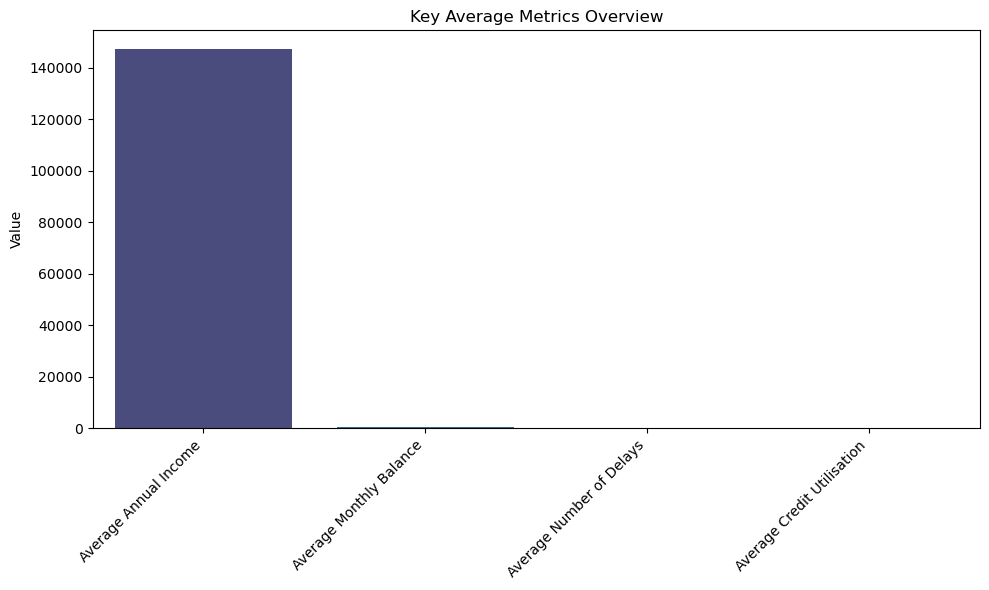

In [92]:
# Prepare data for plotting
metrics = [
    avg_annual_income,
    avg_monthly_balance,
    avg_num_delays,
    avg_credit_util
]
metric_names = [
    "Average Annual Income",
    "Average Monthly Balance",
    "Average Number of Delays",
    "Average Credit Utilisation"
]

# Plot bar chart for key metrics
plt.figure(figsize=(10, 6))
sns.barplot(x=metric_names, y=metrics, palette="viridis")
plt.title("Key Average Metrics Overview")
plt.ylabel("Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Investigate the relationship between age and changes in credit limit. Analyse how variations in customer age correlate with adjustments in their credit limits to understand if and how credit limit changes are influenced by age-related factors. This insight can help in tailoring credit products and strategies based on different age demographics. How is the payment behaviour of people different for different credit mix categories?

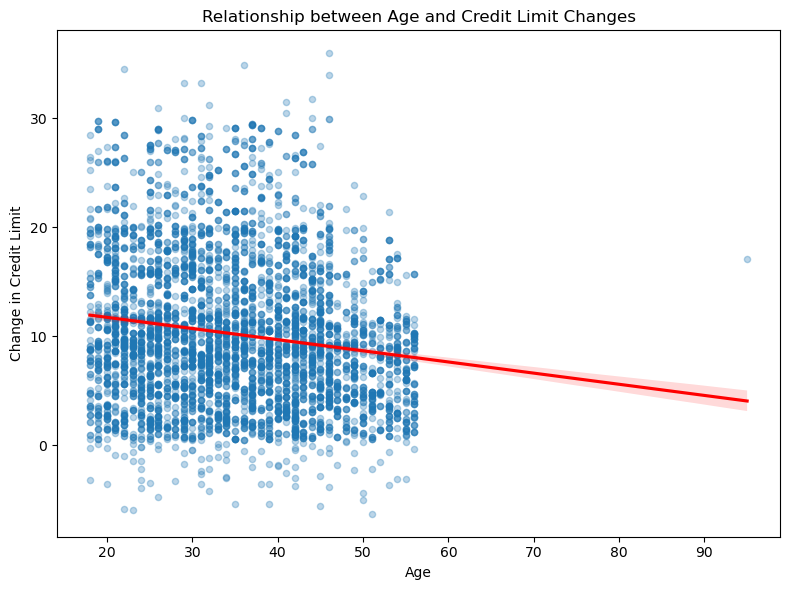

Correlation between Age and Change in Credit Limit: -0.15


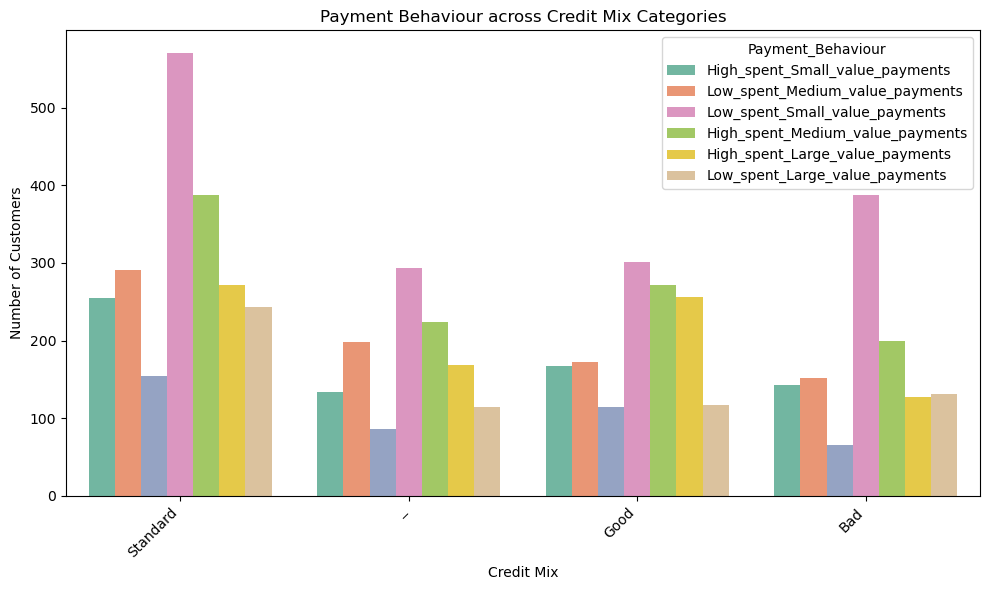

In [88]:
# Convert Changed_Credit_Limit to numeric for analysis
df['Changed_Credit_Limit_num'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

# 1. Relationship between Age and Credit Limit Changes
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Age',
    y='Changed_Credit_Limit_num',
    data=df,
    scatter_kws={'alpha': 0.3, 's': 20},
    line_kws={'color': 'red'}
)
plt.title('Relationship between Age and Credit Limit Changes')
plt.xlabel('Age')
plt.ylabel('Change in Credit Limit')
plt.tight_layout()
plt.show()

corr = df[['Age', 'Changed_Credit_Limit_num']].corr().iloc[0, 1]
print(f"Correlation between Age and Change in Credit Limit: {corr:.2f}")

# 2. Payment Behaviour by Credit Mix Category
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Credit_Mix',
    hue='Payment_Behaviour',
    data=df,
    palette='Set2'
)
plt.title('Payment Behaviour across Credit Mix Categories')
plt.xlabel('Credit Mix')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Generate a distribution plot to visualise the age demographics of the customer base. This plot should illustrate the frequency and distribution of various ages to provide insights into the age profile of the population served, aiding in targeted marketing and service strategies

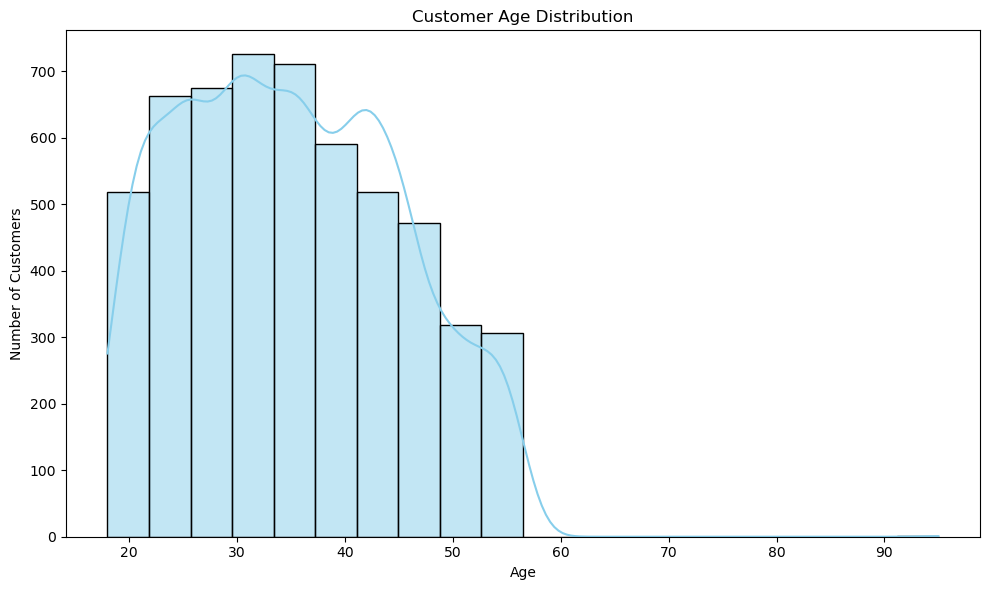

In [93]:
# Distribution plot for Age demographics
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

the above analysis should be done for the following columns
- name
- age
- gender
- occupation
- location
- credit limit
- credit mix
- payment behaviour
- annual income
- monthly balance
- delays in payment

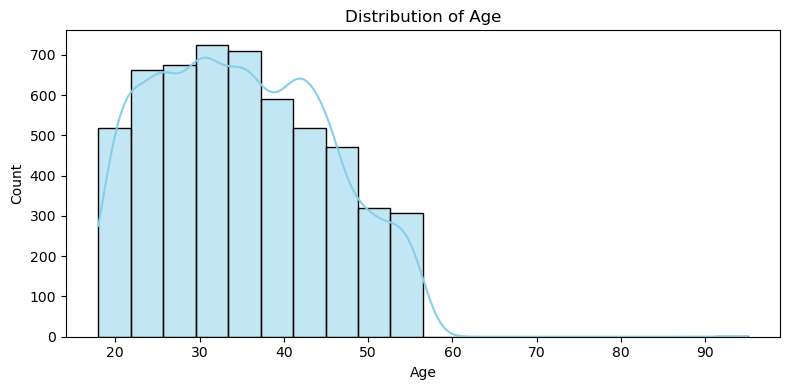

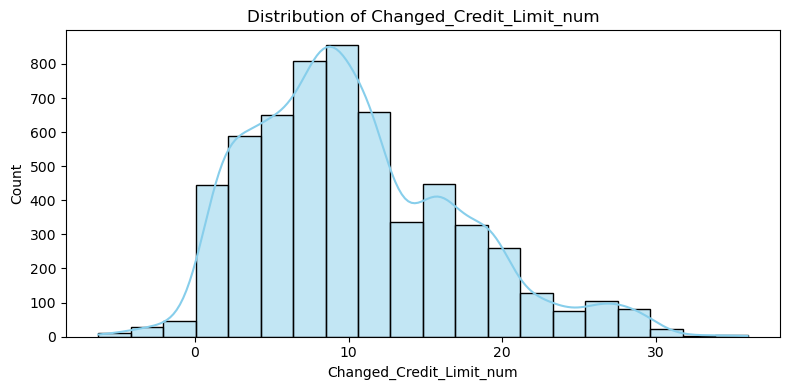

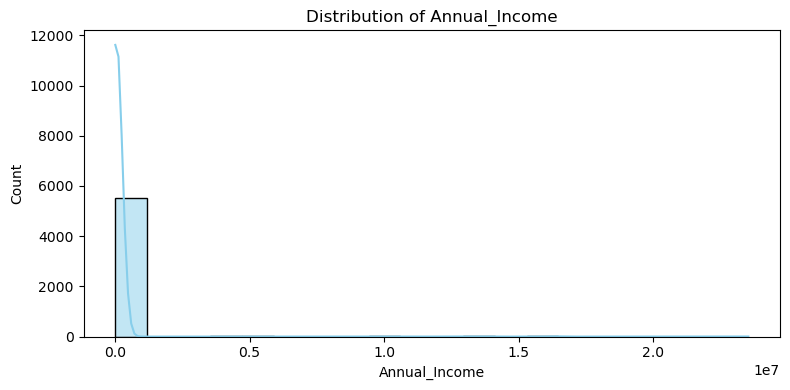

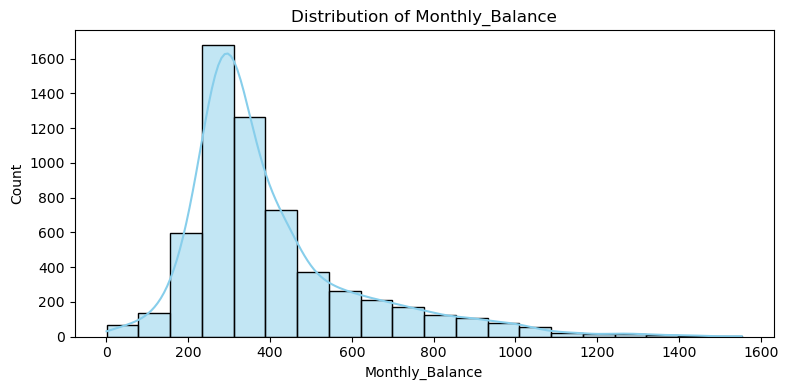

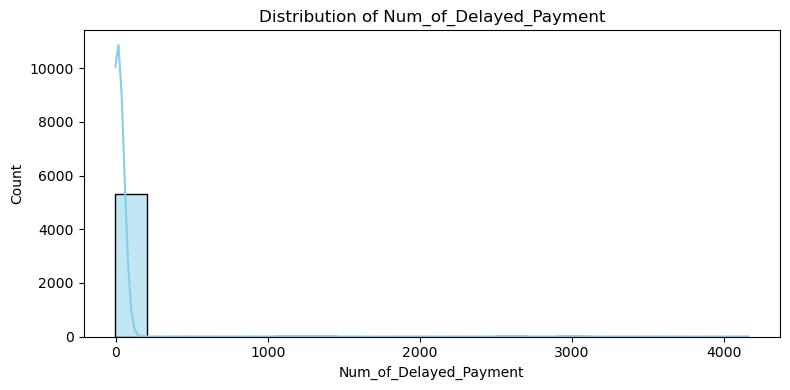

C:\Users\USER\AppData\Local\Temp\ipykernel_8240\1664414008.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(top_vals)], order=top_vals, palette='viridis')


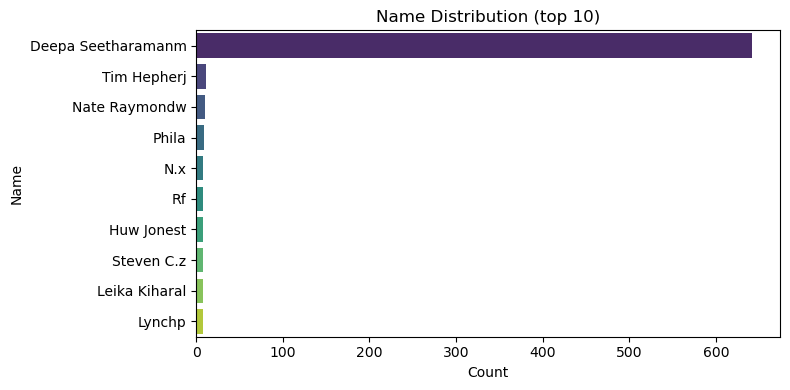

C:\Users\USER\AppData\Local\Temp\ipykernel_8240\1664414008.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(top_vals)], order=top_vals, palette='viridis')


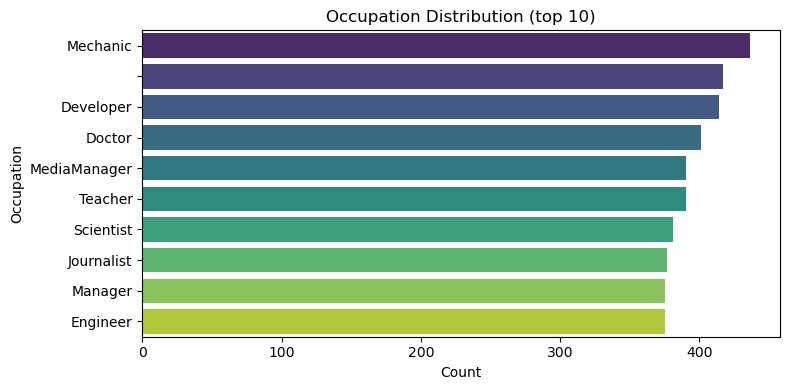

C:\Users\USER\AppData\Local\Temp\ipykernel_8240\1664414008.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(top_vals)], order=top_vals, palette='viridis')


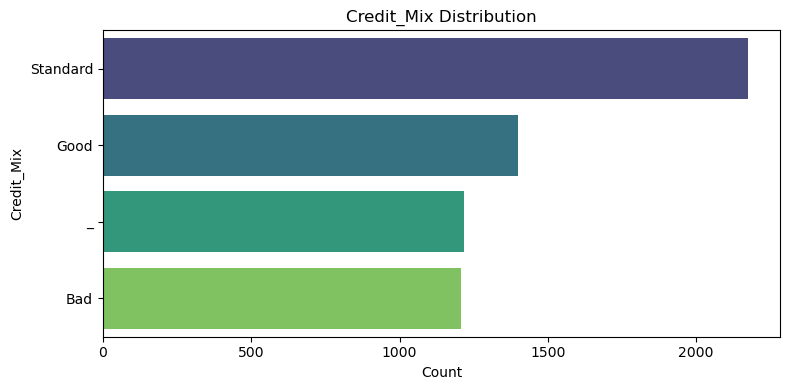

C:\Users\USER\AppData\Local\Temp\ipykernel_8240\1664414008.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df[df[col].isin(top_vals)], order=top_vals, palette='viridis')


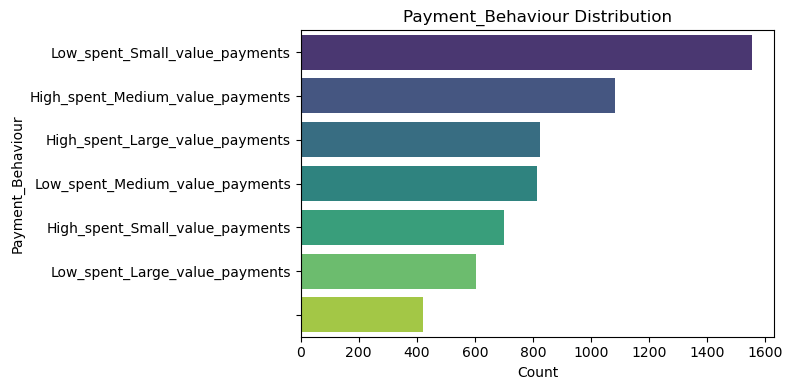

In [94]:
# Analysis for specified columns

# 1. Numeric distributions
numeric_cols = {
    'Age': 20,
    'Changed_Credit_Limit_num': 20,
    'Annual_Income': 20,
    'Monthly_Balance': 20,
    'Num_of_Delayed_Payment': 20
}

for col, bins in numeric_cols.items():
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), bins=bins, kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

# 2. Categorical counts (show top 10 where appropriate)
cat_cols = ['Name', 'Occupation', 'Credit_Mix', 'Payment_Behaviour']
for extra in ['Gender', 'Location']:
    if extra in df.columns:
        cat_cols.append(extra)

for col in cat_cols:
    if col in df.columns:
        vc = df[col].value_counts()
        top_vals = vc.index[:10] if vc.size > 10 else vc.index
        plt.figure(figsize=(8, 4))
        sns.countplot(y=col, data=df[df[col].isin(top_vals)], order=top_vals, palette='viridis')
        plt.title(f'{col} Distribution{" (top 10)" if vc.size>10 else ""}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

I want to see a number of people of different age groups having  different kinds of credit scores.
  for making the age group consider the following rule: -
               	14-19   “Teen”
               	19-25   “Young Adult”
               	25-35   “Old Adult”
               	35-45   “Old”
               	>45  	“Senior citizen”


Credit_Mix      Bad  Good  Standard    _
Age_Group                               
Adult           385   375       607  389
Old Adult       356   364       616  320
Senior Citizen   81   423       387  207
Teen             35     5        31   17
Young Adult     190   202       325  183


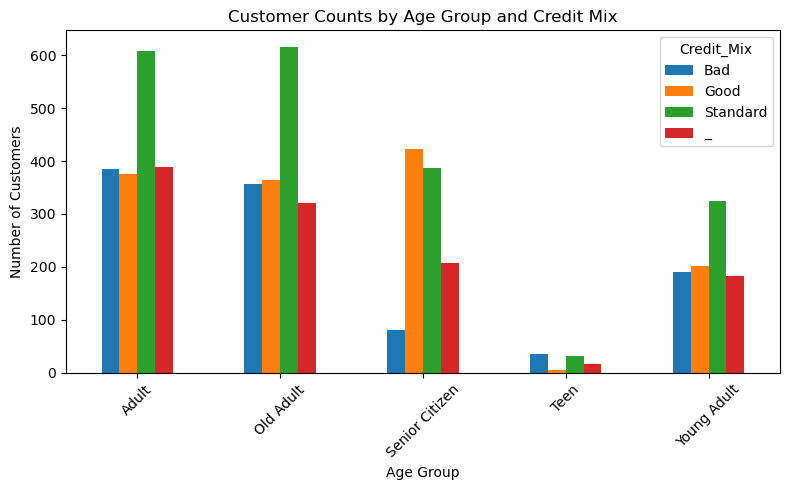

In [96]:
# Map ages into the specified age groups
def map_age_group(age):
    if 14 <= age < 19:
        return 'Teen'
    elif 19 <= age < 25:
        return 'Young Adult'
    elif 25 <= age < 35:
        return 'Adult'
    elif 35 <= age < 45:
        return 'Old Adult'
    elif age >= 45:
        return 'Senior Citizen'
    else:
        return np.nan

df['Age_Group'] = df['Age'].apply(map_age_group)

# Tabulate counts of Credit_Mix within each Age_Group
age_credit_counts = df.groupby(['Age_Group', 'Credit_Mix']).size().unstack(fill_value=0)
print(age_credit_counts)

# Visualise with a grouped bar chart
age_credit_counts.plot(kind='bar', figsize=(8, 5))
plt.title('Customer Counts by Age Group and Credit Mix')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyse the frequency of various payment behaviours within each credit mix category. Examine how often different payment behaviours occur across different types of credit mixes .This analysis will provide insights into payment behaviour trends associated with each credit mix, helping to tailor risk management and credit strategies

Payment_Behaviour       High_spent_Large_value_payments  \
Credit_Mix                                                
Bad                 66                              127   
Good               115                              256   
Standard           154                              272   
_                   86                              169   

Payment_Behaviour  High_spent_Medium_value_payments  \
Credit_Mix                                            
Bad                                             200   
Good                                            271   
Standard                                        388   
_                                               224   

Payment_Behaviour  High_spent_Small_value_payments  \
Credit_Mix                                           
Bad                                            143   
Good                                           167   
Standard                                       255   
_                                           

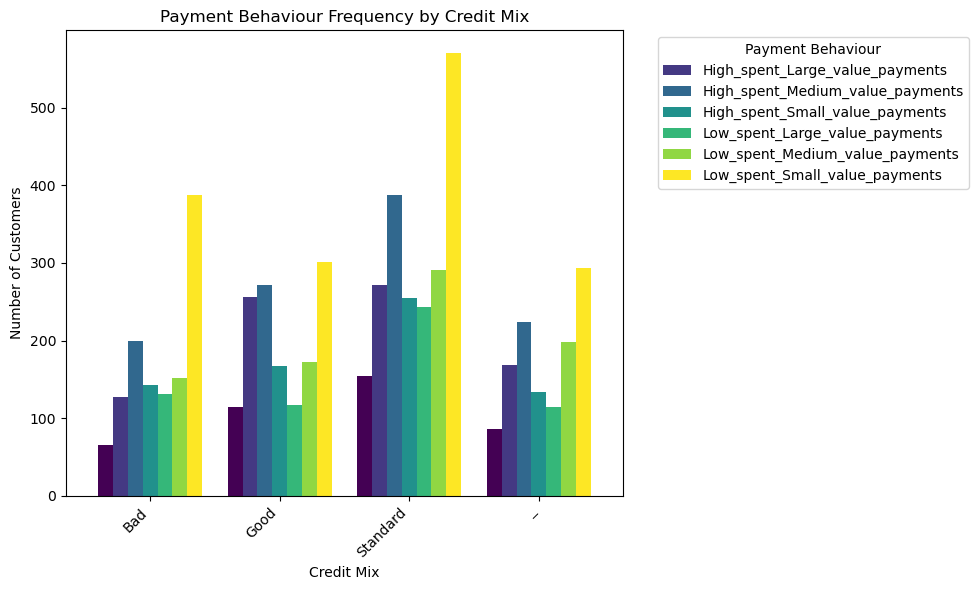

In [97]:
# Frequency of payment behaviours within each credit mix category
payment_credit_counts = df.groupby(['Credit_Mix', 'Payment_Behaviour']).size().unstack(fill_value=0)
print(payment_credit_counts)

# Plot grouped bar chart
ax = payment_credit_counts.plot(
    kind='bar',
    figsize=(10, 6),
    colormap='viridis',
    width=0.8
)
ax.set_title('Payment Behaviour Frequency by Credit Mix')
ax.set_xlabel('Credit Mix')
ax.set_ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Payment Behaviour', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

	From the data available, is it possible to know the age group of my  potential customers (for approaching loans), if yes then please show how

In [98]:
# 1) Distribution of age‐groups in current data
age_group_counts     = df['Age_Group'].value_counts(dropna=True)
age_group_percentile = (age_group_counts / age_group_counts.sum() * 100).round(2)

print("Current Age‐Group Counts:")
print(age_group_counts)
print("\nCurrent Age‐Group % of Total:")
print(age_group_percentile)

# 2) Example: map a list of new/potential customer ages
potential_ages = [18, 22, 30, 42, 55, 16]
potential_df   = pd.DataFrame({'Age': potential_ages})
potential_df['Age_Group'] = potential_df['Age'].apply(map_age_group)

print("\nPotential Customers Age → Age_Group:")
print(potential_df)

Current Age‐Group Counts:
Age_Group
Adult             1756
Old Adult         1656
Senior Citizen    1098
Young Adult        900
Teen                88
Name: count, dtype: int64

Current Age‐Group % of Total:
Age_Group
Adult             31.94
Old Adult         30.12
Senior Citizen    19.97
Young Adult       16.37
Teen               1.60
Name: count, dtype: float64

Potential Customers Age → Age_Group:
   Age       Age_Group
0   18            Teen
1   22     Young Adult
2   30           Adult
3   42       Old Adult
4   55  Senior Citizen
5   16            Teen


C:\Users\USER\AppData\Local\Temp\ipykernel_8240\3296243216.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


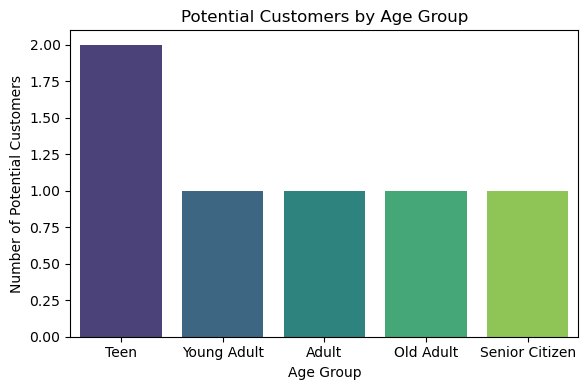

In [99]:
import seaborn as sns

# Visualise the age groups of potential customers
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(
    x='Age_Group',
    data=potential_df,
    order=potential_df['Age_Group'].value_counts().index,
    palette='viridis'
)
plt.title('Potential Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Potential Customers')
plt.tight_layout()
plt.show()

From the data of previous task, I got clear that, I have few ages group as potential customers, however now I want in depth study of it, all those ages will be my potential customers where age average inquiry is more than 7.5

Age groups with avg Num_Credit_Inquiries > 7.5:
Age_Group
Adult             25.04
Old Adult         28.26
Senior Citizen    30.88
Teen              68.42
Young Adult       39.76
Name: Num_Credit_Inquiries, dtype: float64

Summary for potential age groups:
                Num_Credit_Inquiries  Annual_Income  Monthly_Balance  \
Age_Group                                                              
Adult                          25.04      119786.44           388.45   
Old Adult                      28.26      140037.31           385.77   
Senior Citizen                 30.88      146710.92           461.40   
Teen                           68.42       35603.96           321.34   
Young Adult                    39.76      174093.60           407.39   

                Credit_Utilization_Ratio  Num_of_Delayed_Payment  \
Age_Group                                                          
Adult                              32.12                   25.83   
Old Adult                          

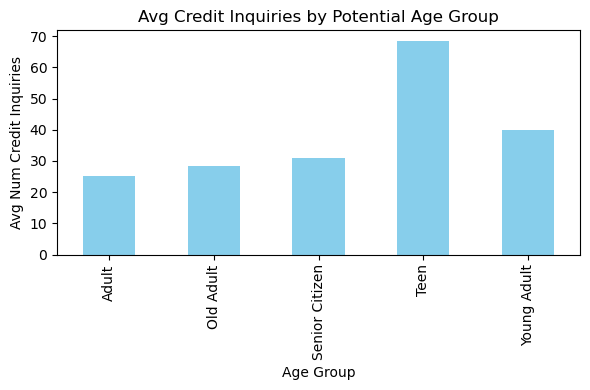

In [100]:
# 1. Compute average number of credit inquiries per age group
avg_inq_by_age = df.groupby('Age_Group')['Num_Credit_Inquiries'] \
                  .mean().round(2)

# 2. Select age groups with average inquiries > 7.5
potential_age_groups = avg_inq_by_age[avg_inq_by_age > 7.5].index.tolist()
print("Age groups with avg Num_Credit_Inquiries > 7.5:")
print(avg_inq_by_age.loc[potential_age_groups])

# 3. Subset the DataFrame for these potential age groups
df_potential = df[df['Age_Group'].isin(potential_age_groups)]

# 4. In‑depth summary statistics for these groups
summary = df_potential.groupby('Age_Group').agg({
    'Num_Credit_Inquiries':'mean',
    'Annual_Income':'mean',
    'Monthly_Balance':'mean',
    'Credit_Utilization_Ratio':'mean',
    'Num_of_Delayed_Payment':'mean',
    'Changed_Credit_Limit_num':'mean',
    'Customer_ID':'count'
}).rename(columns={'Customer_ID':'Count'}).round(2)

print("\nSummary for potential age groups:")
print(summary)

# 5. Visualise average inquiries for these age groups
plt.figure(figsize=(6, 4))
avg_inq_by_age.loc[potential_age_groups].plot(
    kind='bar', 
    color='skyblue'
)
plt.title('Avg Credit Inquiries by Potential Age Group')
plt.ylabel('Avg Num Credit Inquiries')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()